# CREDIT CARD FRAUD DETECTION

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Reading Credit Card Data

In [2]:
train_data = pd.read_csv("fraudTrain.csv")
test_data =pd.read_csv("fraudTest.csv")

In [3]:
train_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
train_data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [6]:
train_data.shape

(1296675, 23)

In [7]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Transactions by category')

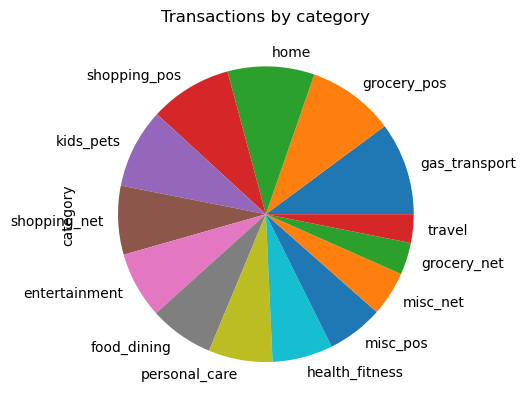

In [9]:
train_data['category'].value_counts().plot.pie()
plt.title("Transactions by category")

<Axes: xlabel='count', ylabel='category'>

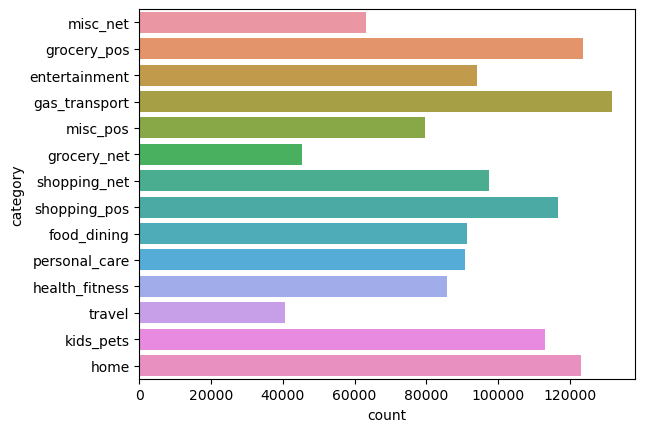

In [10]:
sns.countplot(data =train_data, y ="category")

<Axes: xlabel='gender', ylabel='count'>

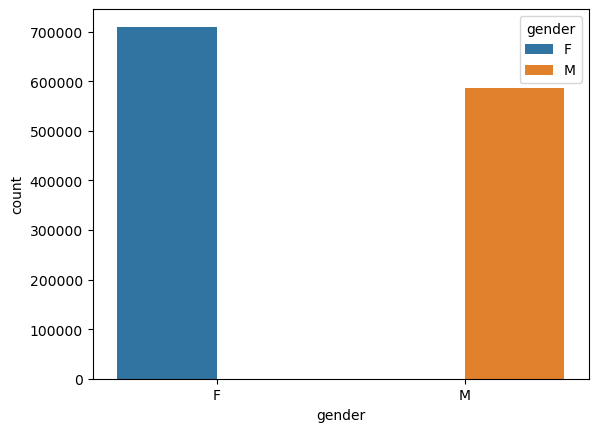

In [11]:
sns.countplot(data = train_data, x = "gender", hue = "gender")

### Droping unwanted data

In [12]:
train_data = train_data.drop(columns = ["trans_num","Unnamed: 0","trans_date_trans_time","cc_num","merchant","first","last","street","dob"], axis = 1)
test_data = test_data.drop(columns = ["trans_num","Unnamed: 0","trans_date_trans_time","cc_num","merchant","first","last","street","dob"], axis = 1)

In [13]:
train_data.columns

Index(['category', 'amt', 'gender', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

## Categorical Encoding 

In [14]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [15]:
encoder = LabelEncoder()
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["city"] = encoder.fit_transform(train_data["city"])
train_data["state"] = encoder.fit_transform(train_data["state"])
train_data["job"] = encoder.fit_transform(train_data["job"])


In [16]:
train_data.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,9,41.96,1,216,45,24433,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0


In [17]:
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["city"] = encoder.fit_transform(test_data["city"])
test_data["state"] = encoder.fit_transform(test_data["state"])
test_data["job"] = encoder.fit_transform(test_data["job"])

In [18]:
test_data.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,10,2.86,1,157,39,29209,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,10,29.84,0,16,43,84002,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,5,41.28,0,61,33,11710,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,9,60.05,1,764,8,32780,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,13,3.19,1,247,21,49632,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0


<Axes: >

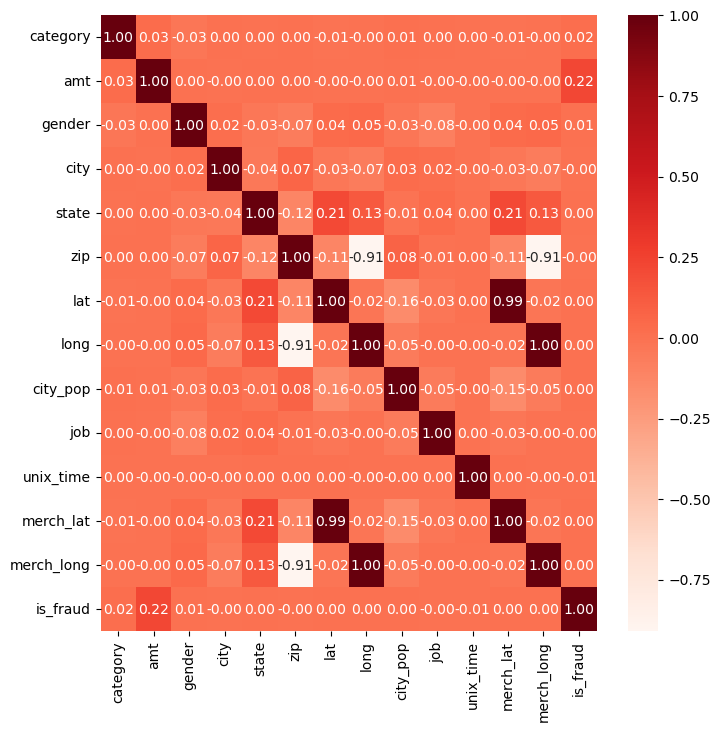

In [19]:
plt.figure(figsize = (8,8))
sns.heatmap(train_data.corr(), cmap = "Reds", annot = True, fmt = ".2f")

## Split Data into train and test 

In [20]:
y_train = train_data["is_fraud"]
X_train = train_data.drop(["is_fraud"], axis = 1)
y_test = test_data["is_fraud"]
X_test = test_data.drop(["is_fraud"], axis = 1)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1296675, 13), (555719, 13), (1296675,), (555719,))

# Model Training

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

## Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

## Decision Tree

In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Model Evaluation

In [25]:
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Decision Tree:")

print(classification_report(y_test, y_pred_dt))

Logistic Regression:


C:\Users\mayank\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mayank\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mayank\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.28      0.55      0.37      2145

    accuracy                           0.99    555719
   macro avg       0.64      0.77      0.69    555719
weighted avg       1.00      0.99      0.99    555719



In [26]:
cmLR=confusion_matrix(y_test,y_pred_lr)

<Axes: >

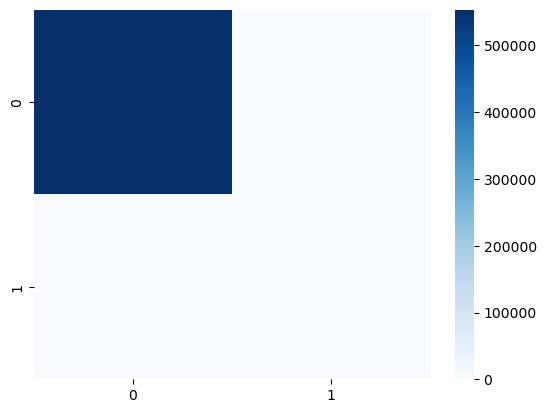

In [27]:
sns.heatmap(data=cmLR,cmap='Blues')


In [28]:
cmDT=confusion_matrix(y_test,y_pred_dt)

<Axes: >

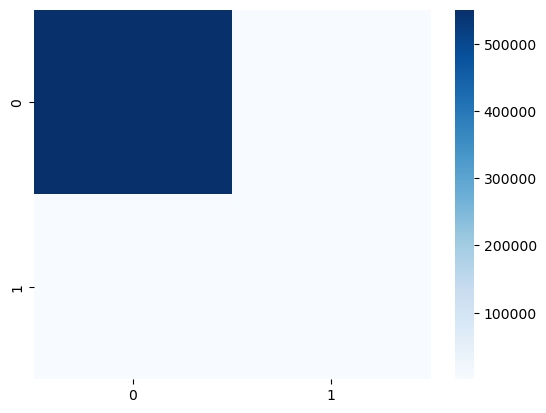

In [29]:
sns.heatmap(data=cmDT,cmap='Blues')

In [30]:
test_data['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [31]:
accuracyLR=accuracy_score(y_test,y_pred_lr)
accuracyDT=accuracy_score(y_test,y_pred_dt)

In [32]:
accuracyLR , accuracyDT

(0.9961401355721147, 0.9929100858527421)